# Proyek Analisis Data: [PRSA_Data_Aotizhongxin_20130301-20170228]
- Nama: [Putri Andani]
- Email: [putryandanii14@gmail.com]
- ID Dicoding: [putriandani]

## Menentukan Pertanyaan bisnis

- Bagaimana pola polusi udara (PM2.5, PM10, SO2, NO2, CO, O3) di berbagai bulan atau musim sepanjang tahun?
- Bagaimana suhu (TEMP), tekanan udara (PRES), dan kelembaban (DEWP) berkorelasi dengan tingkat polutan udara?
- Bagaimana Kualitas Udara pada tahun 2013 - 2017 berdasarkan frekuensi PM2.5

## Import library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## A.  Data Wrangling

### 1. Gathering data

In [2]:
# membaca data yang telah diunduh
df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")

In [3]:
# menampilkan 5 data teratas
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
# menampilkan 5 data terbawah
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin
35063,35064,2017,2,28,23,19.0,31.0,10.0,79.0,600.0,42.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Aotizhongxin


In [5]:
# menampilkan semple data secara random
df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
21456,21457,2015,8,12,0,93.0,153.0,7.0,34.0,1300.0,135.0,28.1,1003.5,20.9,0.0,WSW,2.6,Aotizhongxin
13693,13694,2014,9,22,13,128.0,188.0,8.0,90.0,3000.0,5.0,21.2,1011.8,18.0,0.0,NE,0.0,Aotizhongxin
14075,14076,2014,10,8,11,238.0,238.0,16.0,97.0,1800.0,23.0,16.4,1013.8,14.1,0.5,ESE,0.7,Aotizhongxin
12597,12598,2014,8,7,21,98.0,98.0,9.0,53.0,1700.0,201.0,27.4,1003.4,20.0,0.0,WSW,1.6,Aotizhongxin
16256,16257,2015,1,7,8,16.0,20.0,21.0,59.0,900.0,2.0,-5.0,1026.0,-16.8,0.0,NE,1.1,Aotizhongxin


### 2. Asessing data

In [6]:
# melihat dimensi data
df.shape

(35064, 18)

In [7]:
# melihat informasi data secara keseluruhan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


jika diperhatikan ada beberapa variabel dengan jumlah kolom yang lebih sedikit, artinya ada missing value pada data tersebut

In [8]:
# melihat jumlah missing value pada data
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

wahh ternyata ada banyak missing value pada data ini, terutama pada variabel NO2, CO, O3 yang mencapai 1000an missing value. tentunya ini tidak bisa diatasi dengan metode dropping karena akan menghilangkan banya informasi penting. 

In [9]:
# melihat apakah ada data yang sama
df.duplicated().sum()

0

In [10]:
df.describe(include = "all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,34983,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,NaN,1.204071,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


ada banyak variabel yang memiliki range sangat jauh antara quartile ke-3 dengan nilai max nya

### 3. Cleaning Data

karena semua data diambil dari stasiun yang sama yaitu Aotizhongxin, maka kita dapat menghapus kolom "station" dan juga kolom No yang tentu sjaa tidak memiliki korelasi antar variabel lainya. kolom "RAIN" juga dihapus karena data didominasi oleh nilai 0, jika dilakukan metode input mean pada variabel tersebut maka akan sangat merubah nilai mean awal. oleh karena itu pada analisis ini akan dilakukan metode dropping

In [11]:
df = df.drop(columns = ['station', 'No', 'RAIN'])

In [12]:
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,wd,WSPM
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,NNW,4.4
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,N,4.7
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,NNW,5.6
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,NW,3.1
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,NW,2.4
35060,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,WNW,0.9
35061,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,NW,1.1
35062,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,NNW,1.2


In [13]:
# mengubah type data variabel 'wd' ke numerik
df['wd'] = pd.Categorical(df['wd']).codes

In [14]:
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,wd,WSPM
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,6,4.4
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,3,4.7
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,6,5.6
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,7,3.1
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,7,2.4
35060,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,14,0.9
35061,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,7,1.1
35062,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,6,1.2


In [15]:
df.isna().sum()

year        0
month       0
day         0
hour        0
PM2.5     925
PM10      718
SO2       935
NO2      1023
CO       1776
O3       1719
TEMP       20
PRES       20
DEWP       20
wd          0
WSPM       14
dtype: int64

### Imputation fillna()
ini digunakan untuk mengisi NaN pada variabel dengan missng value yang masih terhitung sedikit yaitu variabel TEMP, PRES, DEWP, RAIN, dan WSPM

In [16]:
# Kolom yang ingin diisi dengan mean
columns_to_fill = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Mengisi NaN dengan mean untuk kolom yang ditentukan
for column in columns_to_fill:
    if column in df.columns:
        mean_value = df[column].mean()  # Hitung mean kolom
        df[column] = df[column].fillna(mean_value)  # Isi NaN dengan mean


kemudian untuk variabel dengan missing value yang sangat banyak, akan digunakan metode interpolasi

Melihat tren variabel yang memiliki missing value, sehingga dapat ditentukan pola interpolate yang terbaik


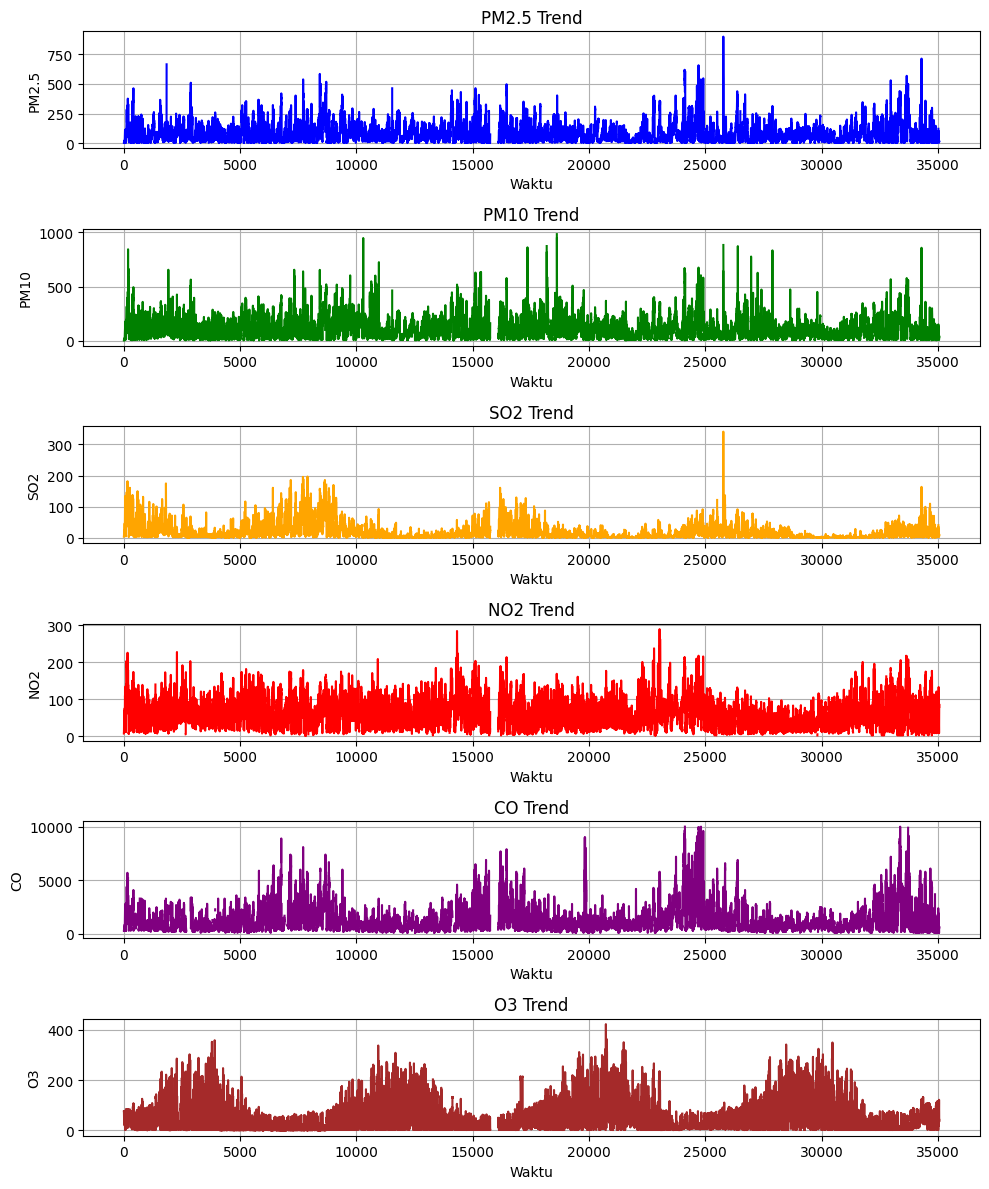

In [17]:
plt.figure(figsize=(10, 12))  # menentukan ukuran figure yang lebih besar untuk 6 subplot

# Subplot 1: PM2.5
plt.subplot(6, 1, 1)
plt.plot(df['PM2.5'], label='PM2.5', color='blue')
plt.title('PM2.5 Trend')
plt.xlabel('Waktu')
plt.ylabel('PM2.5')
plt.grid(True)

# Subplot 2: PM10
plt.subplot(6, 1, 2)
plt.plot(df['PM10'], label='PM10', color='green')
plt.title('PM10 Trend')
plt.xlabel('Waktu')
plt.ylabel('PM10')
plt.grid(True)

# Subplot 3: SO2
plt.subplot(6, 1, 3)
plt.plot(df['SO2'], label='SO2', color='orange')
plt.title('SO2 Trend')
plt.xlabel('Waktu')
plt.ylabel('SO2')
plt.grid(True)

# Subplot 4: NO2
plt.subplot(6, 1, 4)
plt.plot(df['NO2'], label='NO2', color='red')
plt.title('NO2 Trend')
plt.xlabel('Waktu')
plt.ylabel('NO2')
plt.grid(True)

# Subplot 5: CO
plt.subplot(6, 1, 5)
plt.plot(df['CO'], label='CO', color='purple')
plt.title('CO Trend')
plt.xlabel('Waktu')
plt.ylabel('CO')
plt.grid(True)

# Subplot 6: O3
plt.subplot(6, 1, 6)
plt.plot(df['O3'], label='O3', color='brown')
plt.title('O3 Trend')
plt.xlabel('Waktu')
plt.ylabel('O3')
plt.grid(True)

# Tampilkan semua subplot
plt.tight_layout()  # Agar layout lebih rapi
plt.show()


tren data berfluktuasi dengan smooth maka dapat digunakan "Spline" sebagai bentuk interpolasinya

In [20]:
# Kolom yang ingin diisi dengan metode interpolasi spline
columns_to_interpolate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Menggunakan interpolasi spline hanya pada kolom yang dipilih
for column in columns_to_interpolate:
    if column in df.columns:
        df[column] = df[column].interpolate(method='spline', order = 1)

In [21]:
df.isna().sum()

year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
wd       0
WSPM     0
dtype: int64

#### Finally semua data telah bersih data missing value !

## Exploratory Data Analysis (EDA)

### 1.  Outlier

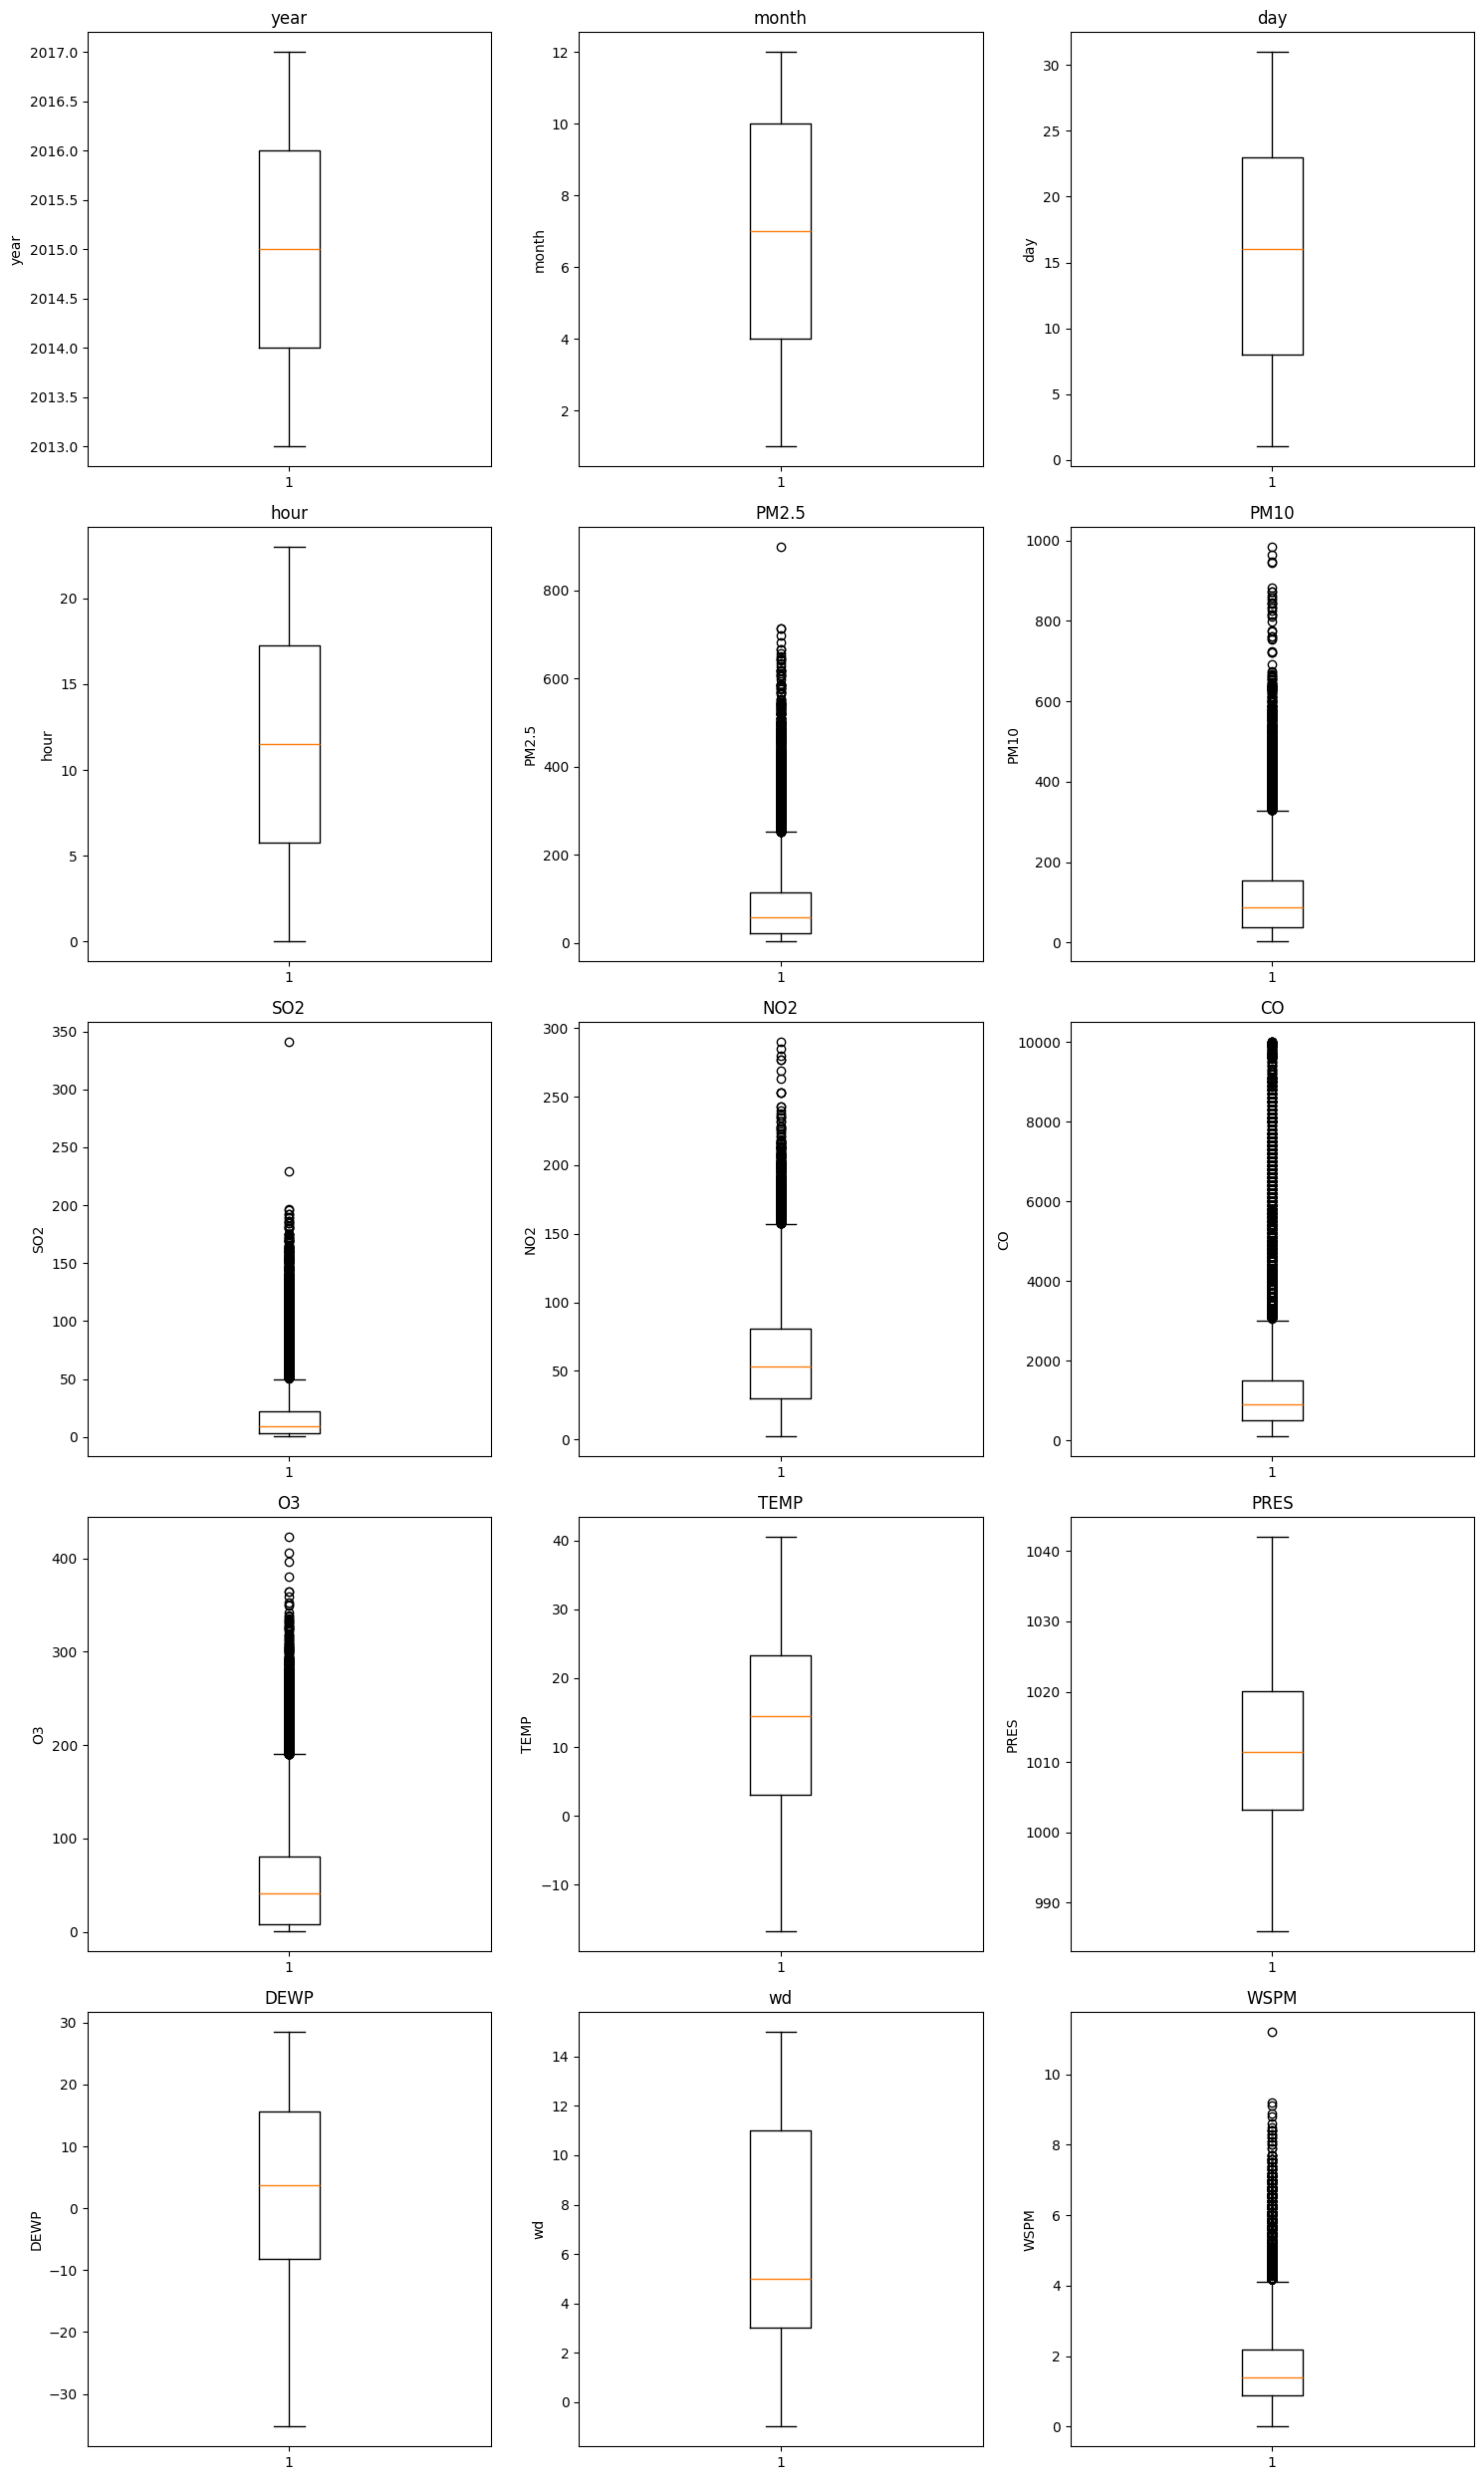

In [22]:
n = len(df.columns)
n_cols = 3  # Jumlah kolom dalam subplot
n_rows = (n // n_cols) + (n % n_cols > 0)  # Jumlah baris yang dibutuhkan

# Membuat figure dan axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flattening axes array untuk mempermudah iterasi
axes = axes.flatten()

# Loop untuk membuat boxplot untuk setiap kolom
for i, col in enumerate(df.columns):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)
    axes[i].set_ylabel(col)

# Menyembunyikan axes yang tidak terpakai
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Agar layout lebih rapi
plt.show()

mengganti outlier dengan nilai ambang batas (upper bound dan lower bound).

In [23]:
for column in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3','WSPM']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])


Mem-Plot kembali, untuk memeriksa apakah data sudah bersih dari outlier

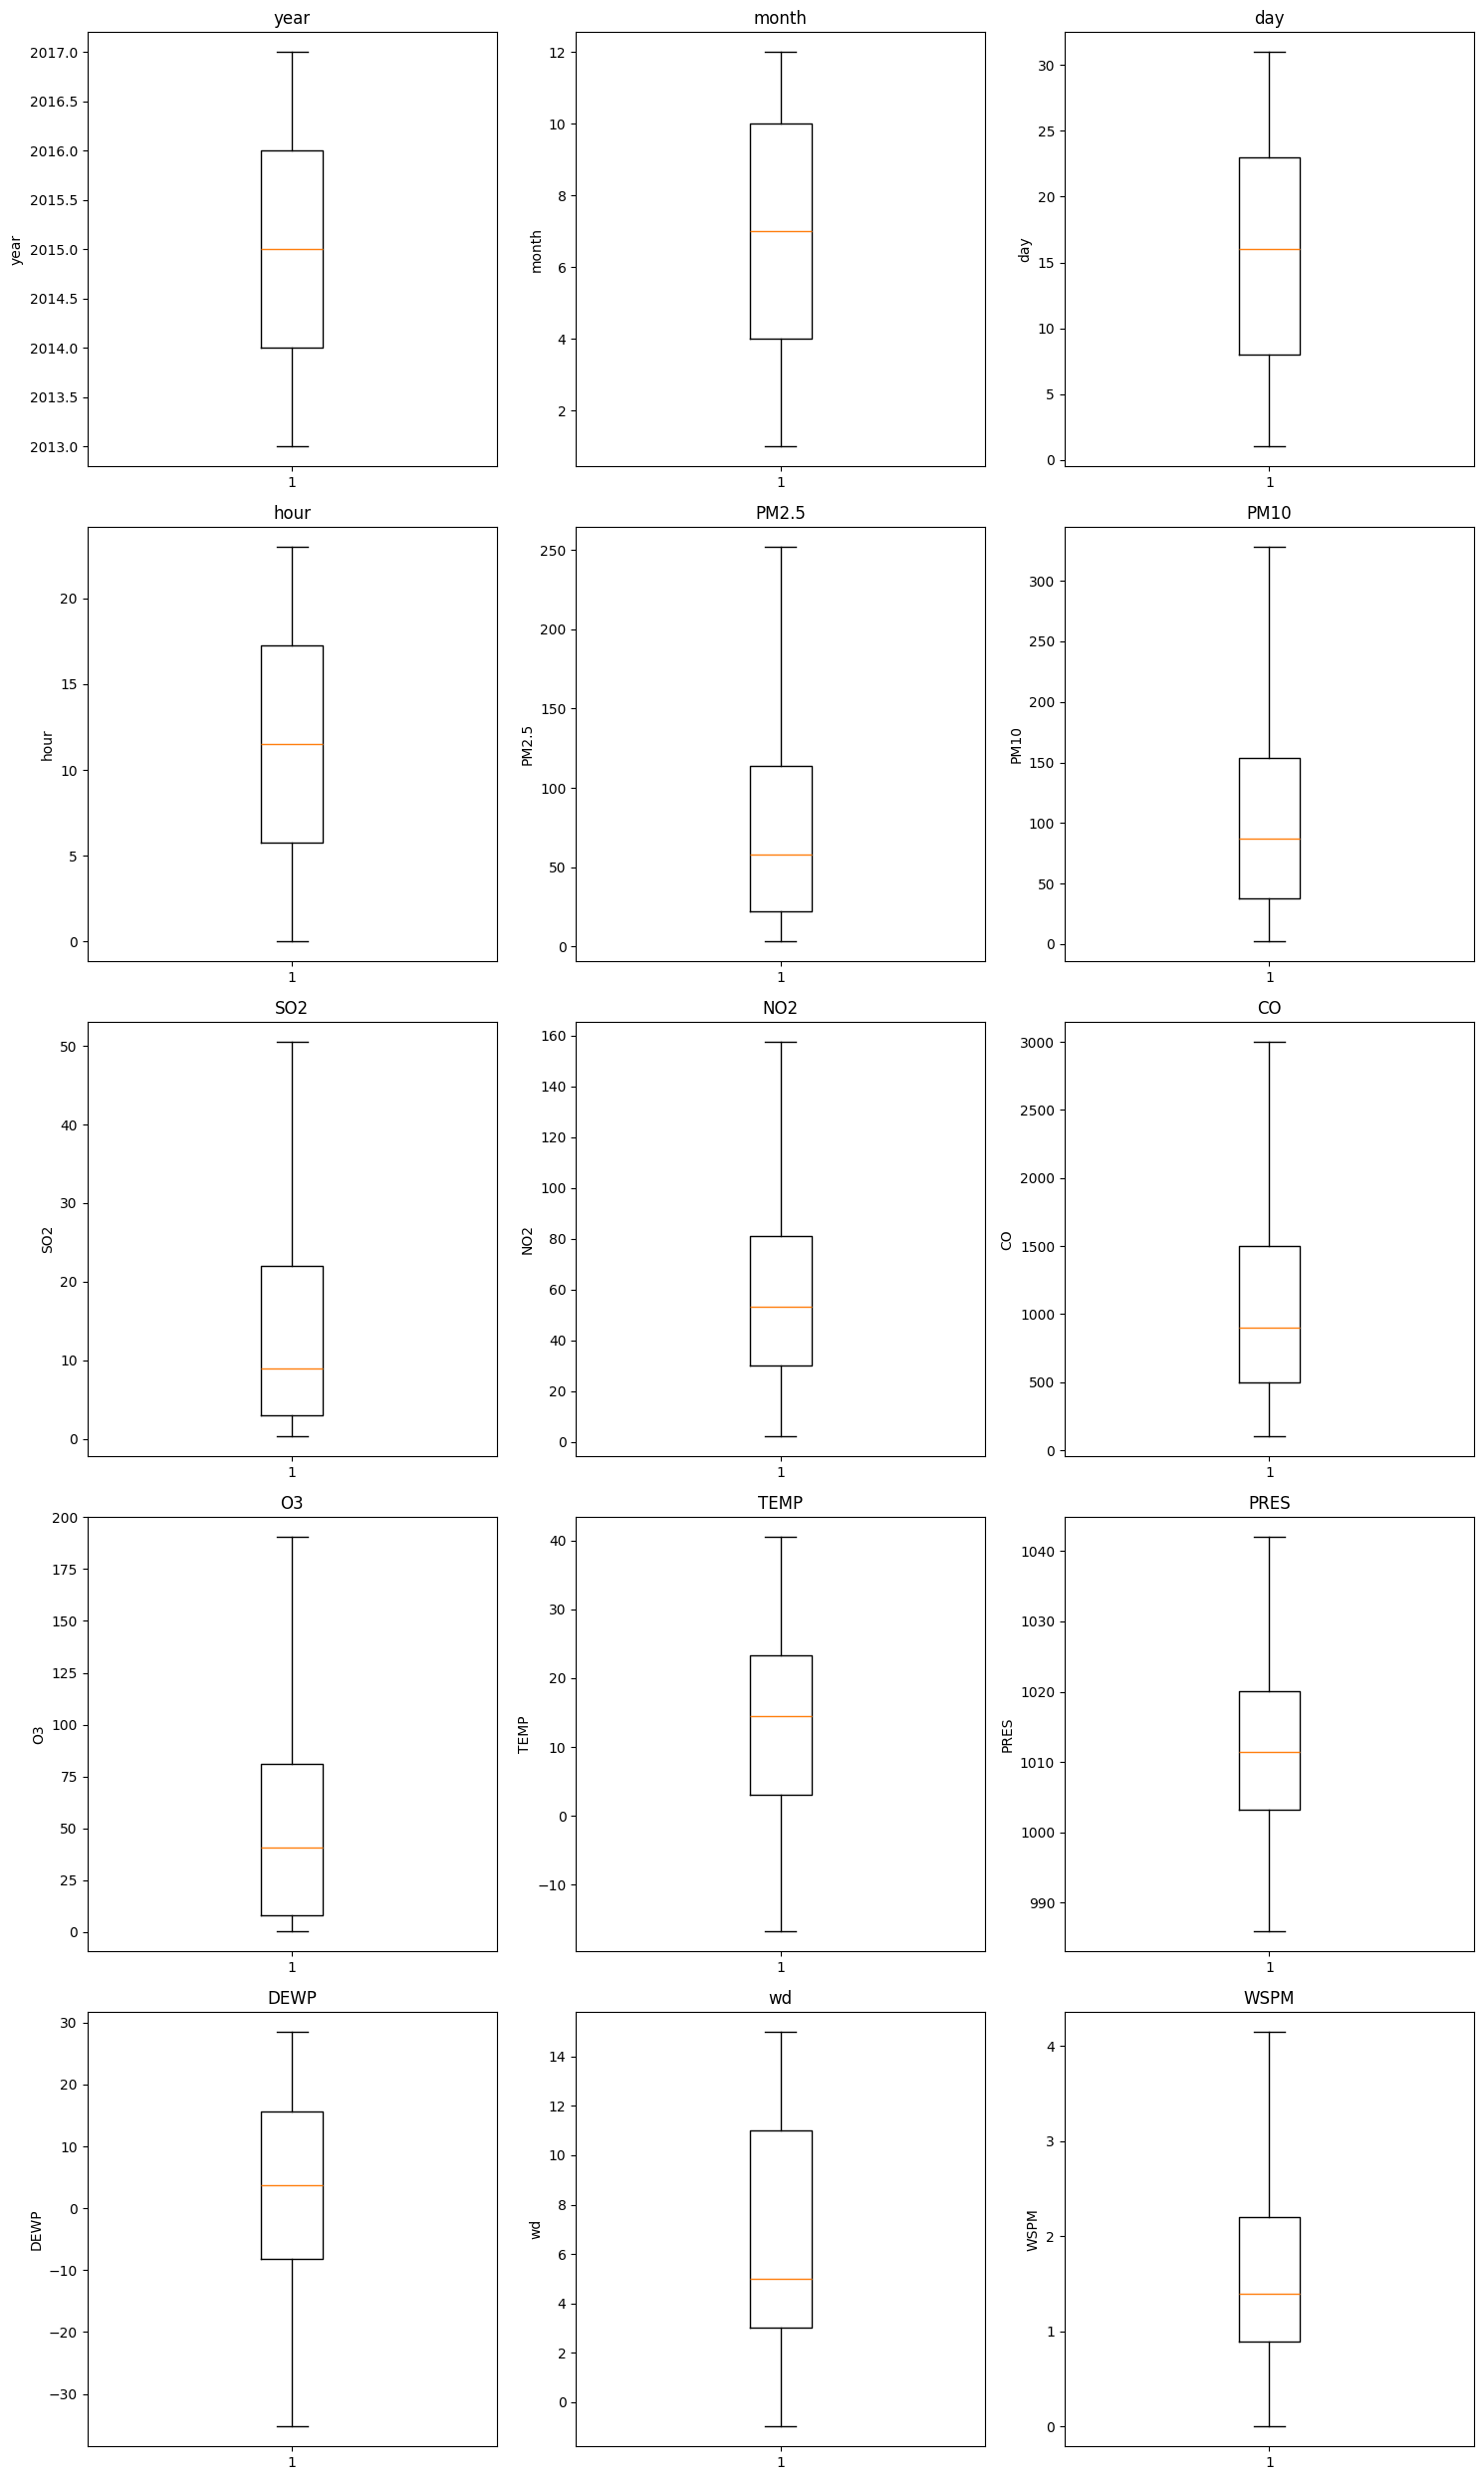

In [24]:
n = len(df.columns)
n_cols = 3  # Jumlah kolom dalam subplot
n_rows = (n // n_cols) + (n % n_cols > 0)  # Jumlah baris yang dibutuhkan

# Membuat figure dan axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flattening axes array untuk mempermudah iterasi
axes = axes.flatten()

# Loop untuk membuat boxplot untuk setiap kolom
for i, col in enumerate(df.columns):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)
    axes[i].set_ylabel(col)

# Menyembunyikan axes yang tidak terpakai
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Agar layout lebih rapi
plt.show()

In [25]:
df.describe(include = 'all')

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,wd,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2014.662560,6.522930,15.729637,11.500000,78.727795,107.101446,15.161823,58.704780,1138.740004,53.785977,13.584607,1011.846920,3.123062,6.524184,1.662749
std,1.177213,3.448752,8.800218,6.922285,69.231815,84.087912,15.234358,35.777721,829.967625,52.590212,11.395845,10.401079,13.684991,4.692068,1.070414
min,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,-1.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,3.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,5.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,114.000000,154.000000,22.000000,81.000000,1500.000000,81.000000,23.300000,1020.100000,15.600000,11.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,252.000000,328.000000,50.500000,157.500000,3000.000000,190.500000,40.500000,1042.000000,28.500000,15.000000,4.150000


In [26]:
# melihat korelasi antar variabel
df.corr()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,wd,WSPM
year,1.000000e+00,-2.020099e-01,-5.569082e-03,1.164482e-15,-0.047944,-0.091512,-0.195219,-0.117744,0.015724,0.091723,-0.137126,0.232452,-0.197175,-0.060958,0.142118
month,-2.020099e-01,1.000000e+00,1.052232e-02,4.724770e-16,0.011484,-0.028070,-0.242448,0.105667,0.035303,-0.120426,0.130309,-0.005655,0.273095,-0.071956,-0.173235
day,-5.569082e-03,1.052232e-02,1.000000e+00,-4.489555e-17,0.003229,0.029405,-0.010202,0.008516,-0.016962,0.000583,0.014320,0.022532,0.023420,0.002383,-0.012060
hour,1.164482e-15,4.724770e-16,-4.489555e-17,1.000000e+00,-0.011946,0.024527,0.010541,-0.051783,-0.039481,0.303916,0.141116,-0.037600,-0.013425,0.236052,0.163427
PM2.5,-4.794409e-02,1.148365e-02,3.228629e-03,-1.194627e-02,1.000000,0.887881,0.495815,0.684159,0.789111,-0.176494,-0.098043,-0.030336,0.158562,-0.087381,-0.303883
PM10,-9.151189e-02,-2.806970e-02,2.940515e-02,2.452675e-02,0.887881,1.000000,0.503459,0.672231,0.701710,-0.163514,-0.097600,-0.046342,0.084777,-0.046629,-0.222022
SO2,-1.952189e-01,-2.424484e-01,-1.020157e-02,1.054067e-02,0.495815,0.503459,1.000000,0.457958,0.605840,-0.231377,-0.394329,0.241128,-0.326448,-0.002040,-0.117533
NO2,-1.177439e-01,1.056670e-01,8.515504e-03,-5.178330e-02,0.684159,0.672231,0.457958,1.000000,0.725191,-0.529919,-0.235570,0.075301,0.073901,-0.133154,-0.509379
CO,1.572358e-02,3.530331e-02,-1.696152e-02,-3.948137e-02,0.789111,0.701710,0.605840,0.725191,1.000000,-0.385752,-0.359615,0.204123,-0.070102,-0.175142,-0.340687
O3,9.172332e-02,-1.204261e-01,5.826220e-04,3.039160e-01,-0.176494,-0.163514,-0.231377,-0.529919,-0.385752,1.000000,0.596871,-0.427477,0.294184,0.298700,0.379838


## Visualisasi dan Analisis Lanjutan

#### Bagaimana rata-rata polutan udara tiap bulan?

           PM2.5        PM10        SO2        NO2           CO         O3
month                                                                     
1      84.444933  107.406620  27.319052  65.084308  1598.034274  27.142305
2      79.609666  100.122788  24.293142  54.275565  1306.379056  43.149521
3      94.967845  144.788374  25.570178  63.008157  1300.672883  47.291080
4      78.313495  129.087500  15.713536  52.750448   843.597222  64.052964
5      66.706523  113.346304  14.928663  48.898522   791.844758  84.822128
6      70.431864   86.320660   8.350184  49.270544   902.074826  89.491974
7      74.858713   84.678427   5.707229  47.718382   828.323421  90.976315
8      55.846255   72.074294   4.449185  48.479084   779.973118  81.665092
9      64.206612   87.073889   7.031585  59.205601   909.321528  51.002712
10     91.145856  118.056620  10.345720  72.989847  1159.139785  27.710222
11     93.535565  119.661910  14.886875  72.319896  1626.423611  17.103327
12     90.472715  121.778

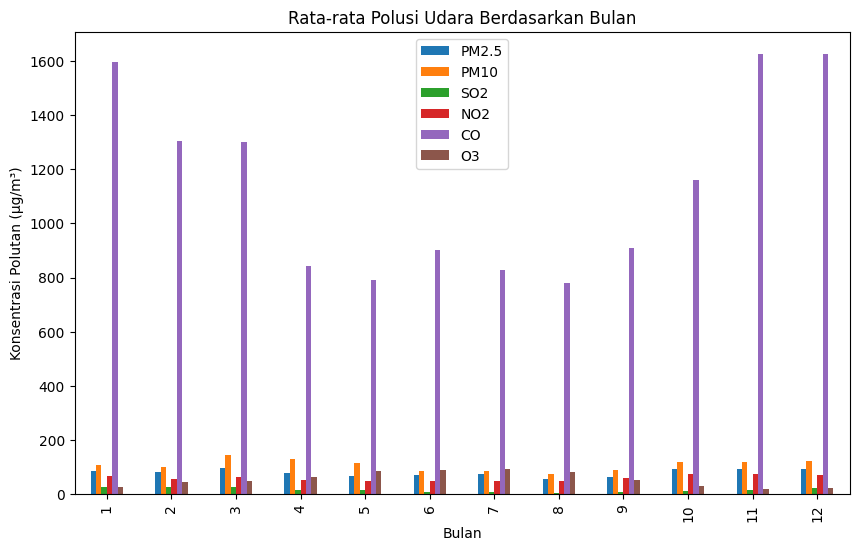

In [27]:
# Grouping berdasarkan bulan
monthly_pollution = df.groupby('month')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Menampilkan hasil rata-rata polusi udara per bulan
print(monthly_pollution)

# Visualisasi pola polusi udara per bulan
monthly_pollution.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Polusi Udara Berdasarkan Bulan')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.xlabel('Bulan')
plt.show()


#### Bagaiamana rata-rata polutan udara tiap tahun?

          PM2.5        PM10        SO2        NO2           CO         O3
year                                                                     
2013  80.459504  111.640114  19.970371  63.137587  1113.021446  46.251400
2014  85.406085  118.458710  17.394235  62.784810  1110.981735  47.723858
2015  77.406254  108.062078  13.208761  60.329914  1223.584475  61.104532
2016  71.189658   92.187785  10.272484  48.227630  1077.248406  59.855988
2017  83.369192   99.873234  18.824859  65.413489  1300.423729  47.436088


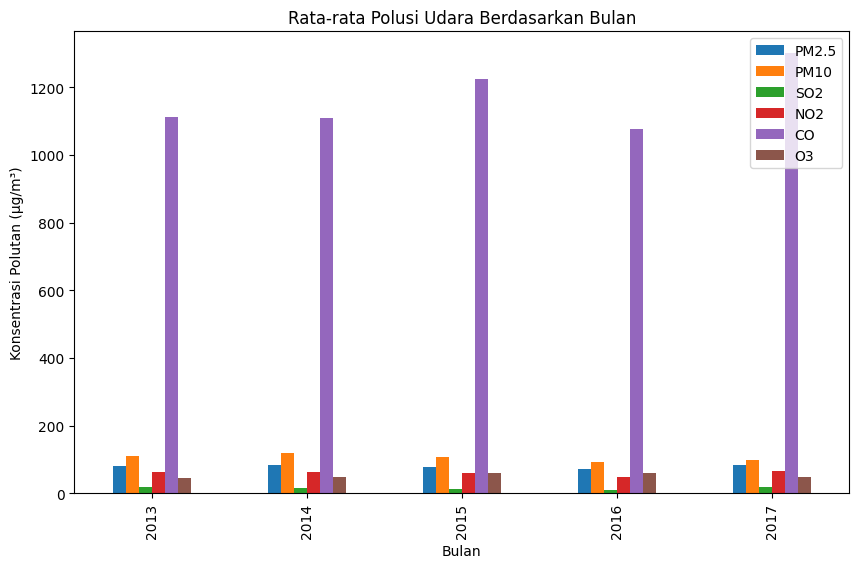

In [28]:
# Grouping berdasarkan tahun
monthly_pollution = df.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Menampilkan hasil rata-rata polusi udara per bulan
print(monthly_pollution)

# Visualisasi pola polusi udara per bulan
monthly_pollution.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Polusi Udara Berdasarkan Bulan')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.xlabel('Bulan')
plt.show()

#### Bagaimana suhu (TEMP), tekanan udara (PRES), dan kelembaban (DEWP) berkorelasi dengan tingkat polutan udara?

<Axes: >

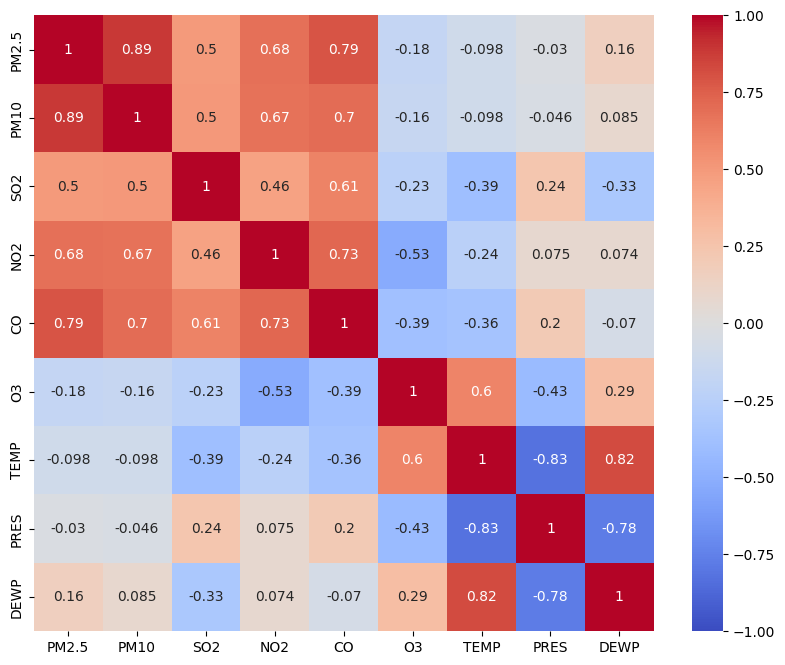

In [29]:
# Menghitung matriks korelasi
corr_matrix = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP']].corr()

# Membuat heatmap dengan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

### Bagaiamana Kualitas Udara setiap tahunya berdasarkan frekuensi PM2.5?

Menggunakan metode Binning untuk clustering Standar Indeks Kualitas Udara 
(https://www.airnow.gov/aqi/aqi-basics/)

In [30]:
# Batas AQI untuk PM2.5 (contoh dari EPA) (https://www.airnow.gov/aqi/aqi-basics/)
bins = [0, 50, 100, 150, 200, 300, float('inf')]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']

# Mengkategorikan kualitas udara berdasarkan PM2.5
df['PM2.5_AQI'] = pd.cut(df['PM2.5'], bins=bins, labels=labels)

# Melihat hasilnya
print(df[['PM2.5', 'PM2.5_AQI']].sample(5))

       PM2.5 PM2.5_AQI
26553   22.0      Good
26545   15.0      Good
19204   31.0      Good
12273   94.0  Moderate
15676   94.0  Moderate


In [31]:
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,wd,WSPM,PM2.5_AQI
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,6,4.15,Good
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,3,4.15,Good
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,6,4.15,Good
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,7,3.10,Good
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,3,2.00,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,7,2.40,Good
35060,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,14,0.90,Good
35061,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,7,1.10,Good
35062,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,6,1.20,Good


C:\Users\putri\AppData\Local\Temp\ipykernel_16212\1161940509.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_aqi_counts = df.groupby(['year', 'PM2.5_AQI']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

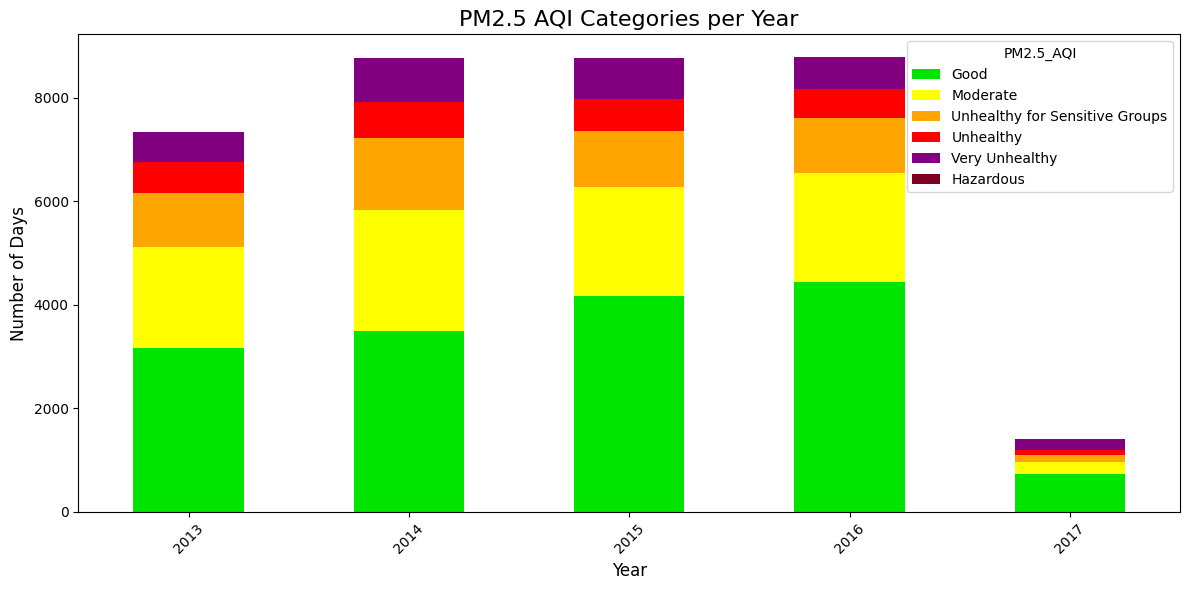

PM2.5_AQI  Good  Moderate  Unhealthy for Sensitive Groups  Unhealthy  \
year                                                                   
2013       3159      1949                            1054        596   
2014       3485      2352                            1388        701   
2015       4164      2113                            1079        622   
2016       4447      2089                            1073        549   
2017        728       229                             136         99   

PM2.5_AQI  Very Unhealthy  Hazardous  
year                                  
2013                  586          0  
2014                  834          0  
2015                  782          0  
2016                  626          0  
2017                  224          0  


In [32]:
# Mengelompokkan berdasarkan tahun dan AQI kategori
annual_aqi_counts = df.groupby(['year', 'PM2.5_AQI']).size().unstack(fill_value=0)

# Menentukan warna sesuai standar AQI
colors = {
    'Good': '#00E400',                       # Hijau
    'Moderate': '#FFFF00',                  # Kuning
    'Unhealthy for Sensitive Groups': '#FFA500',  # Jingga
    'Unhealthy': '#FF0000',                 # Merah
    'Very Unhealthy': '#800080',            # Ungu
    'Hazardous': '#7E0023'                  # Merah Marun
}

# Membuat plot
plt.figure(figsize=(12, 6))
annual_aqi_counts.plot(kind='bar', stacked=True, color=[colors[label] for label in annual_aqi_counts.columns], figsize=(12, 6))

# Menambahkan judul dan label
plt.title('PM2.5 AQI Categories per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Days', fontsize=12)
plt.xticks(rotation=45)

# Menyesuaikan tata letak dan menampilkan plot
plt.tight_layout()
plt.show()

# Print jumlah harian per kategori AQI pertahun
print(annual_aqi_counts)
